In [1]:
#Testing of Normality of a given data

# Shapiro-Wilk Test
import pandas as pd
import numpy as np
import random as random
from scipy.stats import shapiro ,norm 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
df2 = pd.read_csv('ac.csv', names = ['mass','frequency']) 
df2.head()

,mass,frequency
0,1.0,49.0
1,1.2,51.0
2,1.4,51.4
3,1.6,50.0
4,1.8,53.0


In [2]:
# normality test
stat, p = shapiro(df2.frequency)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.963, p=0.260


In [3]:
f = df2.frequency
sd =f.std()
mu = f.mean()
a ,b = mu-3*sd, mu+3*sd
x = np.linspace(a,b,1000)
y = norm.pdf(x, loc = mu, scale = sd)

(array([0.11111111, 0.22222222, 0.05555556, 0.11111111, 0.27777778,
        0.22222222, 0.44444444, 0.16666667, 0.16666667, 0.22222222]),
 array([49. , 49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. ]),
 <a list of 10 Patch objects>)

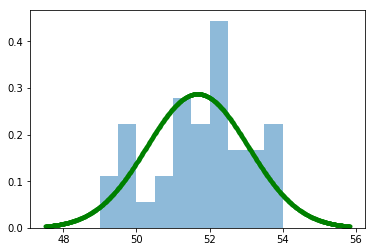

In [4]:


plt.plot(x,y,'.g')

plt.hist(f,alpha=.5,density=True) 

In [5]:
## QQ plot

In [6]:
import statsmodels.api as sm 
import pylab as py 

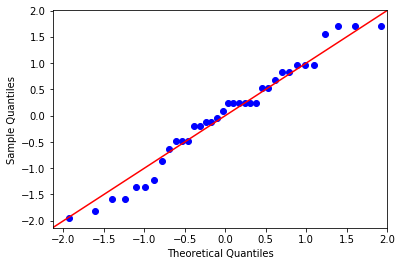

In [7]:
sm.qqplot(f, fit= True, line = "45") 
py.show() 

# Curve Fitting 

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('depre.csv', names = ['mass','depression']) 
data

,mass,depression
0,1.0,0.2
1,1.2,0.6
2,1.4,0.9
3,1.6,1.0
4,1.8,1.2
5,2.0,1.0
6,2.2,1.3
7,2.5,1.4
8,2.8,1.6
9,3.0,1.8


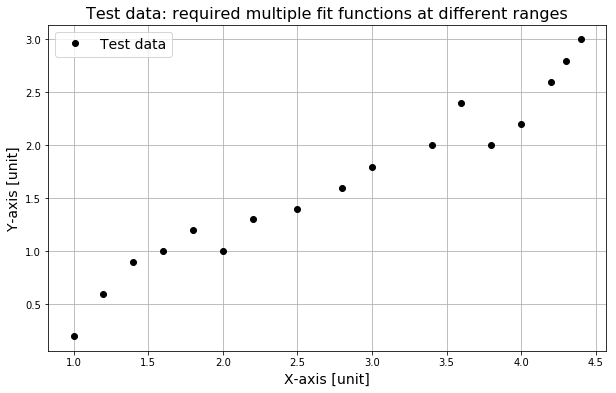

In [10]:

data = np.loadtxt("depre.csv",delimiter = ',')
#data = np.loadtxt("test4multiplot.txt", dtype = str)     #if file contains multiple data types
#data
x = data[:,0]
y = data[:,1]
#plot data
plt.figure(figsize = [10,6])
plt.plot(x,y,"o", color = "black", label = "Test data")
plt.title("Test data: required multiple fit functions at different ranges", fontsize=16)
plt.xlabel('X-axis [unit]', fontsize=14)
plt.ylabel('Y-axis [unit]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)                                 # comment this if u do not need grid
plt.show()

In [11]:
def lin_fun(x,a1,a2):
    return a1*x + a2
def cos_fun(x,a3,a4,a5,a6):
    return a3*np.cos(x+a4)*np.exp(-x*a5) + a6

def exp_fun(x,a7,a8,a9):
    return a7*np.exp(-a8*x) + a9


[ 0.67061909 -0.21489536]
[[ 0.00154633 -0.00429335]
 [-0.00429335  0.0138788 ]]
a1 =  0.6706190916915269 +- 0.03932345527641555
a2 =  -0.2148953606967976 +- 0.11780833255127994


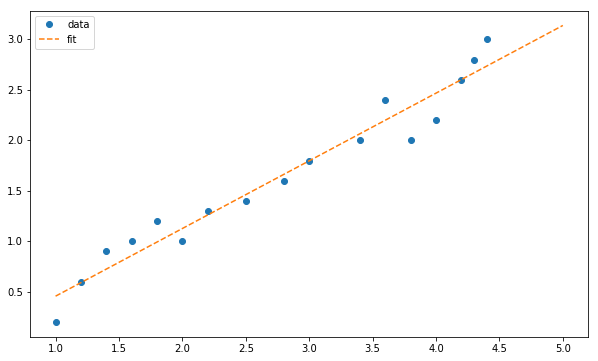

In [12]:
#curve_fit to find best fit parameters using a least square fit.
popt,pcov = curve_fit(lin_fun,x,y)
p1,p2 = popt
print(popt)
print(pcov)
print("a1 = ", popt[0], "+-", pcov[0,0]**0.5)
print("a2 = ", popt[1], "+-", pcov[1,1]**0.5)

#x1_fit = np.arange(min(x1),max(x1),1)
x1_fit = np.arange(min(x),max(x)+1.0,1)
y1_fit = lin_fun(x1_fit, p1, p2)

plt.figure(figsize = [10,6])
plt.plot(x,y,"o", label = "data")
plt.plot(x1_fit,y1_fit,"--", label = "fit")
plt.legend()

In [13]:
from numpy import cov
from scipy.stats import pearsonr

In [14]:
covariance = cov(x,y)
print(covariance)
corr , _ = pearsonr(x,y)
print("Pearson correlation : %.3f" %corr)

[[1.34566176 0.90242647]
 [0.90242647 0.63639706]]
Pearson correlation : 0.975


# High level of correlation(nearly equal to 1) i.e. greater than 0.5 and a positive correlation. 

In [15]:
#np.cov(data)
# correlation between x and y
# t test
# result significance from p value

In [16]:
import matplotlib.pyplot as plt
from numpy import array 
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

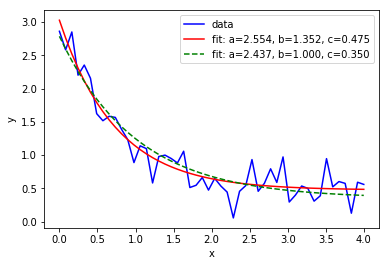

In [17]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data') 
popt, pcov = curve_fit(func, xdata, ydata)
popt
array([ 2.55423706,  1.35190947,  0.47450618])
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) 
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
array([ 2.43708906,  1.        ,  0.35015434]) 
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show() 

In [18]:
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html